#Autoencoders

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


## Encoding And Decoding Layers

### Encoding Layers

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 8
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(6,        activation='sigmoid')(inpt_vec)
elayer2 = Dense(4,        activation='sigmoid') (elayer1)
encoder = Dense(ltnt_dim, activation='sigmoid') (elayer2)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)


### Decoding Layers

In [ ]:
dlayer1 = Dense(4,        activation='sigmoid')(encoder)
dlayer2 = Dense(6,        activation='sigmoid') (dlayer1)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer2)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)


## Loss function

In [ ]:
autoencoder.compile(loss='mean_squared_error', optimizer='sgd')


## Learning and Testing

In [ ]:
import numpy as np

x = np.array([[0., 0., 1., 0., 0., 1., 1., 1.]])

hist = autoencoder.fit(x, x, epochs=10000, verbose=0)

encdd = latent_ncdr.predict(x)
x_hat = autoencoder.predict(x)

print(encdd)
print(x_hat)
print(np.mean(np.square(x-x_hat)))

[[0.21213636 0.31299928]]
[[0.09018627 0.09459728 0.90928394 0.08868112 0.09232567 0.9067399
  0.9080286  0.9078151 ]]
0.00841927793211037


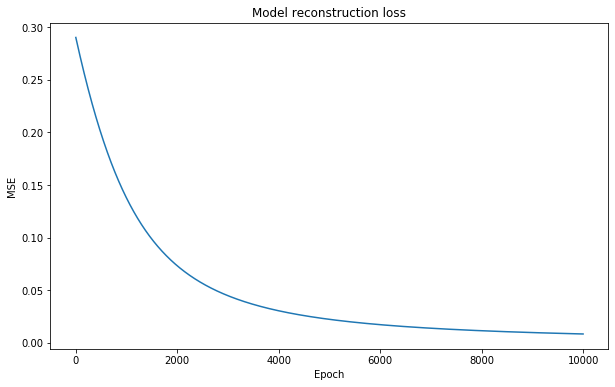

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'])
plt.title('Model reconstruction loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.savefig('ch.7.ae.toy.loss.png', dpi=350, bbox_inches='tight')
plt.show()


In [ ]:
x = np.array([[1., 1., 0., 1., 1., 0., 0., 0.]])

encdd = latent_ncdr.predict(x)
x_hat = autoencoder.predict(x)

print(encdd)
print(x_hat)
print(np.mean(np.square(x-x_hat)))

[[0.21235383 0.31426194]]
[[0.09018419 0.09459427 0.90928924 0.08867746 0.09232257 0.9067443
  0.90803313 0.90781957]]
0.8249455170176906


## Applications in Dimensionality Reduction and Visualization
### MNIST Data Preparation

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


### Autoencoders for MNIST 

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(392,        activation='sigmoid')(inpt_vec)
elayer2 = Dense(28,        activation='sigmoid') (elayer1)
elayer3 = Dense(10,        activation='sigmoid') (elayer2)
encoder = Dense(ltnt_dim, activation='tanh') (elayer3)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dlayer1 = Dense(10,        activation='sigmoid')(encoder)
dlayer2 = Dense(28,        activation='sigmoid')(dlayer1)
dlayer3 = Dense(392,        activation='sigmoid')(dlayer2)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer3)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, 
                       shuffle=True, validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2756 - val_loss: 0.2629
Epoch 2/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2632 - val_loss: 0.2617
Epoch 3/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2547 - val_loss: 0.2441
Epoch 4/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2422 - val_loss: 0.2405
Epoch 5/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2401 - val_loss: 0.2385
Epoch 6/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2378 - val_loss: 0.2362
Epoch 7/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2362 - val_loss: 0.2347
Epoch 8/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2353 - val_loss: 0.2340
Epoch 9/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.23

### Training and Visualization

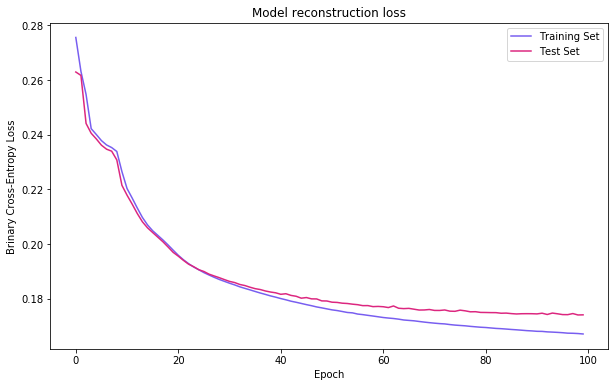

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model reconstruction loss')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.7.ae.mnist.loss.png', dpi=350, bbox_inches='tight')
plt.show()


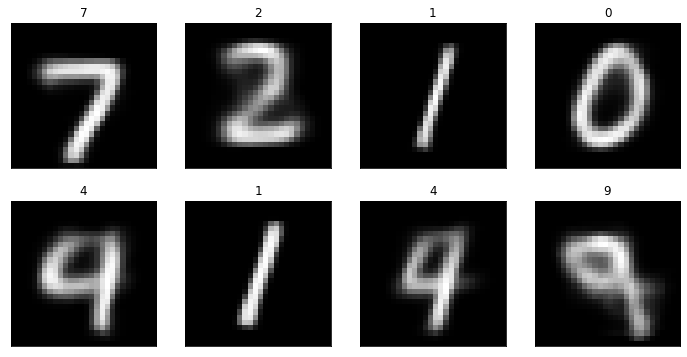

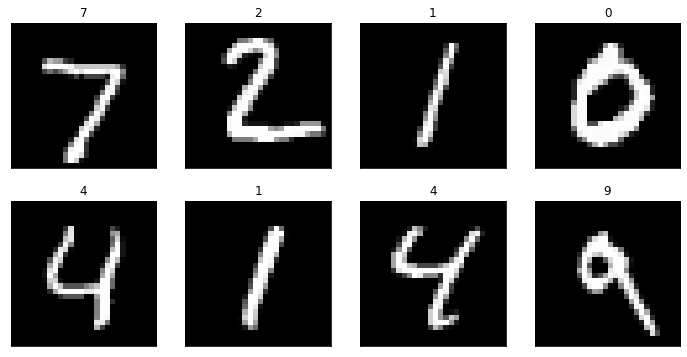

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.7.mnist.4l.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.7.mnist.original.png', bbox_inches='tight', dpi=350)
plt.show()

(10000, 2)


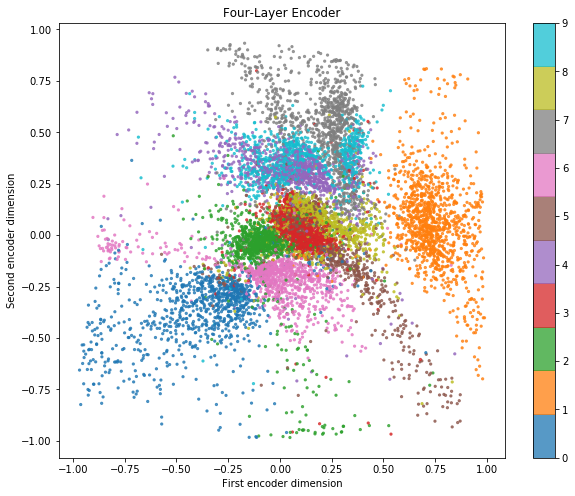

In [ ]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Four-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar()
plt.savefig('ch.7.minist.4l.png', bbox_inches='tight', dpi=350)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(28,        activation='sigmoid')(inpt_vec)
elayer2 = Dense(10,        activation='sigmoid') (elayer1)
encoder = Dense(ltnt_dim, activation='tanh') (elayer2)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dlayer1 = Dense(10,        activation='sigmoid')(encoder)
dlayer2 = Dense(28,        activation='sigmoid')(dlayer1)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer2)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, 
                       shuffle=True, validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3805 - val_loss: 0.2774
Epoch 2/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2700 - val_loss: 0.2661
Epoch 3/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2652 - val_loss: 0.2642
Epoch 4/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2640 - val_loss: 0.2635
Epoch 5/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2636 - val_loss: 0.2632
Epoch 6/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2633 - val_loss: 0.2630
Epoch 7/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2632 - val_loss: 0.2628
Epoch 8/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2631 - val_loss: 0.2627
Epoch 9/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.26

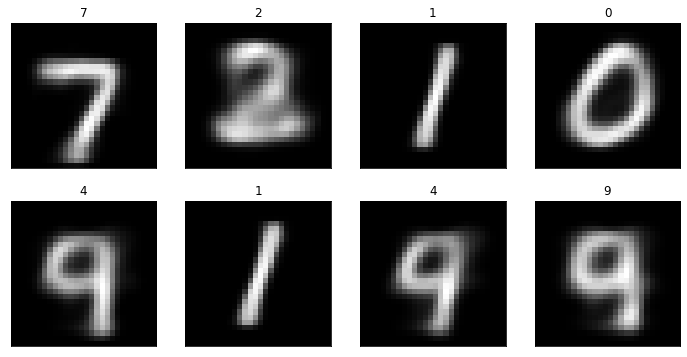

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.7.mnist.3l.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()


(10000, 2)


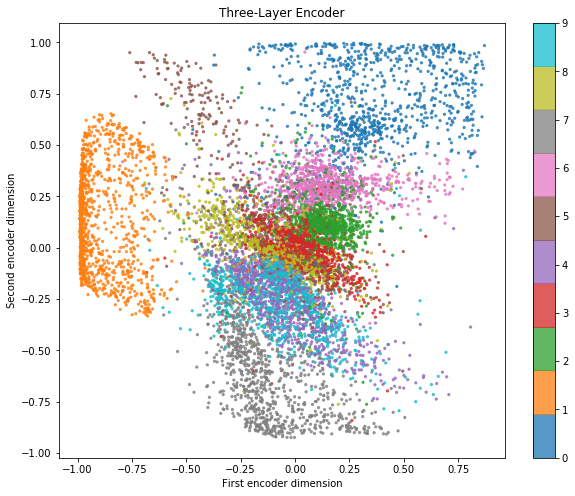

In [ ]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Three-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar()
plt.savefig('ch.7.minist.3l.png', bbox_inches='tight', dpi=350)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(10,        activation='sigmoid')(inpt_vec)
encoder = Dense(ltnt_dim, activation='tanh') (elayer1)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dlayer1 = Dense(10,        activation='sigmoid')(encoder)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer1)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, 
                       shuffle=True, validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4852 - val_loss: 0.3509
Epoch 2/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3111 - val_loss: 0.2885
Epoch 3/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2800 - val_loss: 0.2741
Epoch 4/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2714 - val_loss: 0.2690
Epoch 5/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2679 - val_loss: 0.2666
Epoch 6/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2661 - val_loss: 0.2653
Epoch 7/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2651 - val_loss: 0.2645
Epoch 8/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2645 - val_loss: 0.2640
Epoch 9/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.26

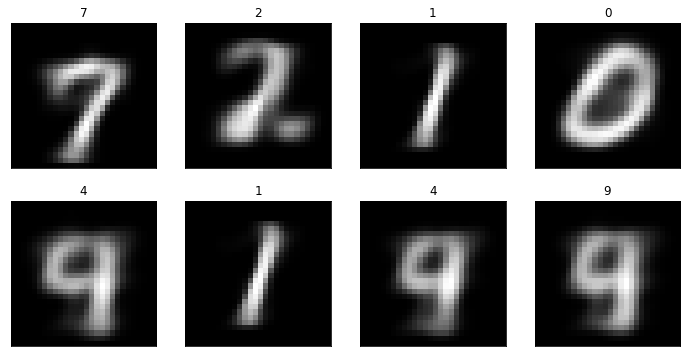

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.7.mnist.2l.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()


(10000, 2)


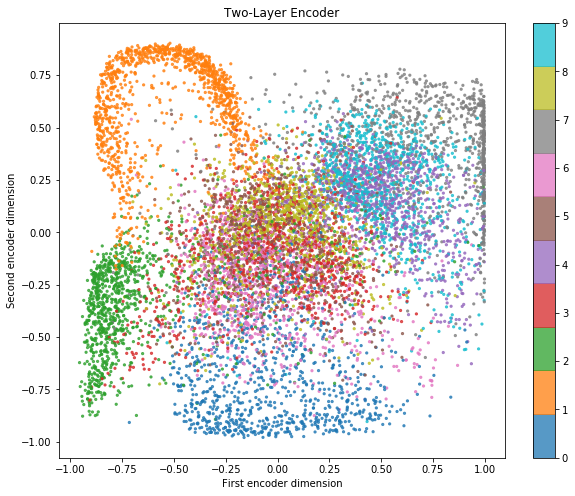

In [ ]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Two-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar()
plt.savefig('ch.7.minist.2l.png', bbox_inches='tight', dpi=350)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
encoder = Dense(ltnt_dim, activation='tanh') (inpt_vec)
# ^ the output here would yield the latent representation

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='sigmoid') (encoder)
# ^ the output here would yield the reconstructed version

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, 
                       shuffle=True, validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.5842 - val_loss: 0.4974
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4442 - val_loss: 0.4019
Epoch 3/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3740 - val_loss: 0.3515
Epoch 4/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3358 - val_loss: 0.3229
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3134 - val_loss: 0.3054
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2994 - val_loss: 0.2942
Epoch 7/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2901 - val_loss: 0.2865
Epoch 8/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2838 - val_loss: 0.2812
Epoch 9/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.27

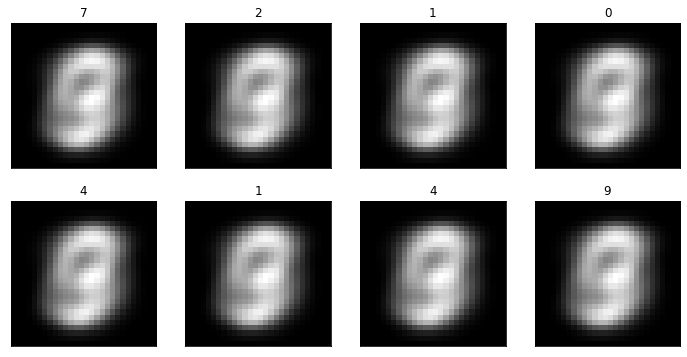

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.7.mnist.1l.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()


(10000, 2)


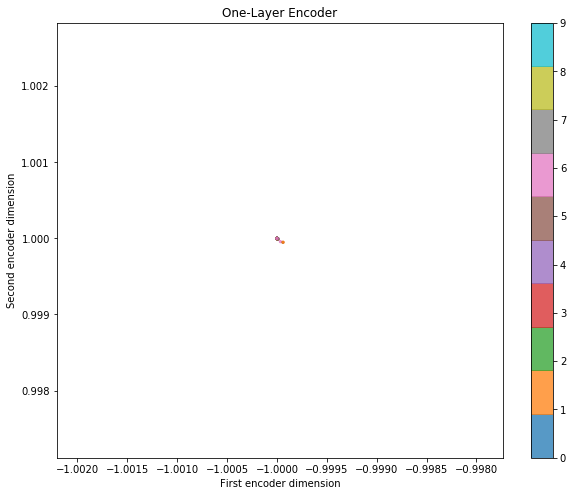

In [ ]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))

X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('One-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar()
plt.savefig('ch.7.minist.1l.png', bbox_inches='tight', dpi=350)